# Дипломная работа по python

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from scipy import stats as st

# 1. Загрузить файл в pandas dataframe

In [2]:
#загрузка файла
data = pd.read_csv('HR.csv')
data

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years department  salary  
0                          0      sales     low  
1                          0      sales  medium  
2                          0      sales  medium  
3                          0      sales     low  
4                          0      sales     low  
...                      ...        ...     ...  
14994                      0    support     low  
14995                      0    support     low  
14996                      0    support     low  
14997                      0    support     low  
14998                      0    support     low  

[14999 rows x 10 columns]

## Описание

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


1.satisfaction_level - Уровень удовлетворенности работой  
2.Last_evaluation - Время с момента последней оценки в годах  
3.number_projects - Количество проектов, выполненных за время работы  
4.average_monthly_hours - Среднее количество часов на рабочем месте в месяц  
5.time_spend_company - Стаж работы в компании в годах  
6.work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником  
7.left - уволился ли сотрудник  
8.promotion_last_5years - повышался ли сотрудник за последние пять лет  
9.department - отдел в котором работает сотрудник  
10.salary - относительный уровень зарплаты  

In [4]:
# проверка пропусков
for col in data.columns:
    pct_missing = data[col].isna().mean()
    print(f'{col} - {pct_missing :.1%}')

satisfaction_level - 0.0%
last_evaluation - 0.0%
number_project - 0.0%
average_montly_hours - 0.0%
time_spend_company - 0.0%
Work_accident - 0.0%
left - 0.0%
promotion_last_5years - 0.0%
department - 0.0%
salary - 0.0%


## Вывод

Датасет содержит данные по опросу уровня удовлетворенности сотрудниками работой.  
Всего 14999 строк и 10 столбцов.  
Первые два столбца - это числа двойной точности, два последних - объекты, а все остальные - целые числа.  
Пропуски отсуствуют.

# 2. Рассчитать основные статистики для переменных.

In [5]:
# основные метрики
data.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [6]:
# мода
data.mode()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.1             0.55             4.0                   135   
1                 NaN              NaN             NaN                   156   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                 3.0            0.0   0.0                    0.0      sales   
1                 NaN            NaN   NaN                    NaN        NaN   

  salary  
0    low  
1    NaN

## Вывод

Уровень удволетворенности у сотрудников выше среднего, однако среднее и мода по данному показателю сильно отличаются. Это может свидетельствовать о большой разнице во мнениях сотрудников.  
Датасет содержит информацию за 10 лет работы.  
Повышение получили всего 2%, а ушли - 23% работника. 

# 3. Рассчитать и визуализировать корреляционную матрицу для количественных переменных.Определить две самые скоррелированные и две наименее скоррелированные переменные.

In [7]:
# Рассчет корреляции для количественных переменных
corr = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr()
corr

satisfaction_level  last_evaluation  number_project  \
satisfaction_level              1.000000         0.105021       -0.142970   
last_evaluation                 0.105021         1.000000        0.349333   
number_project                 -0.142970         0.349333        1.000000   
average_montly_hours           -0.020048         0.339742        0.417211   
time_spend_company             -0.100866         0.131591        0.196786   

                      average_montly_hours  time_spend_company  
satisfaction_level               -0.020048           -0.100866  
last_evaluation                   0.339742            0.131591  
number_project                    0.417211            0.196786  
average_montly_hours              1.000000            0.127755  
time_spend_company                0.127755            1.000000

<AxesSubplot:>

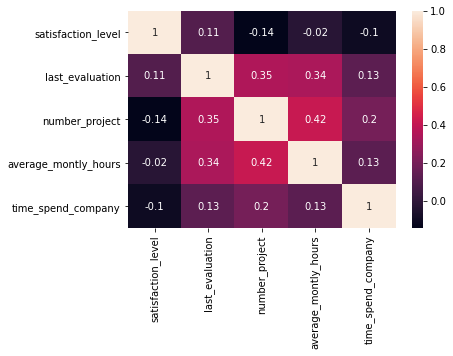

In [8]:
# визуализация
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot = True)

## Вывод

Самые скоррелированные переменные: average_montly_hours & number_project  
Чем больше у сотрудника проектов - тем больше часов он отрабатывает в месяц.


Наименее скоррелированные переменные: average_montly_hours & satisfaction_level  
Чем больше сотрудник работает - тем менее он доволен

# 4. Рассчитать сколько сотрудников работает в каждом департаменте.

In [9]:
data['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

## Вывод

Больше всего сотрудников работает в отделе продаж, меньше всего - в менеджменте.

# 5. Показать распределение сотрудников по зарплатам.

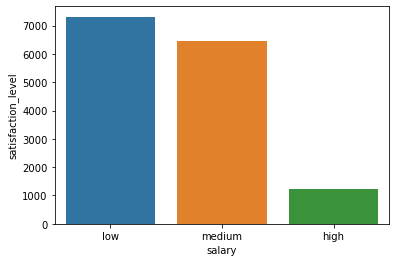

In [10]:
plot = sns.barplot ( x = 'salary', y = 'satisfaction_level', data = data, estimator = len)

## Вывод

Низкую зарплату получают большинство сотрудников, высокую - меньше всего.  
Причем, разница между высокой и средней зарплатой небольшая, а между средней и высокой - больше 4000.

# 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.

<AxesSubplot:xlabel='department'>

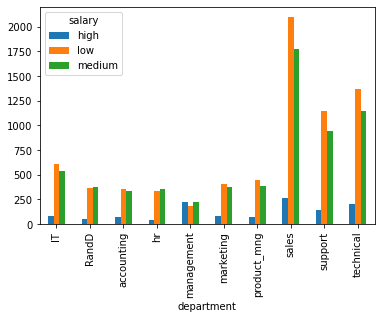

In [11]:
a = data.groupby(['department', 'salary'])['satisfaction_level'].count()
a.unstack().plot(kind = 'bar', stacked = False)

## Вывод

Большое количество высокооплачиваемых сотрудников работают, соответственно, в больших отделах - продажи, тех и поддержке.

# 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

H0: количество часов, проведенных на рабочем месте, у сотрудников с высоким окладом меньше или равно количеству часов у сотрудников с низким окладом.  
H1: количество часов, проведенных на рабочем месте, у сотрудников с высоким окладом больше, чем у сотрудников с низким окладом.

In [12]:
# разделение сотрудников
low = data.loc[data['salary'] == 'low']
high = data.loc[data['salary'] == 'high']

In [13]:
alpha = 0.05

result = st.ttest_ind(low['average_montly_hours'], high['average_montly_hours'], equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу


## Вывод

Не отвергаем нулевую гипотезу. Сотрудники с высоким окладом проводят на рабочем месте меньше или столько же часов, сколько и сотрудники с низким окладом.

# Рассчитать показатели среди уволившихся и не уволившихся сотрудников.

In [14]:
# распределение сотрудников
left = data.loc[data['left'] == 1] # уволившиеся
present = data.loc[data['left'] == 0] # не уволившиеся 

### Доля сотрудников с повышением за последние 5 лет

In [15]:
a = left.loc[left['promotion_last_5years'] == 1].count()
b = left['promotion_last_5years'].count()
a/b*100

satisfaction_level       0.532064
last_evaluation          0.532064
number_project           0.532064
average_montly_hours     0.532064
time_spend_company       0.532064
Work_accident            0.532064
left                     0.532064
promotion_last_5years    0.532064
department               0.532064
salary                   0.532064
dtype: float64

In [16]:
a = present.loc[present['promotion_last_5years'] == 1].count()
b = present['promotion_last_5years'].count()
a/b*100

satisfaction_level       2.625131
last_evaluation          2.625131
number_project           2.625131
average_montly_hours     2.625131
time_spend_company       2.625131
Work_accident            2.625131
left                     2.625131
promotion_last_5years    2.625131
department               2.625131
salary                   2.625131
dtype: float64

Вывод: среди не уволившихся сотрудников процент тех, кто получил повышение за последние пять лет, больше, чем среди уволившихся

### Средняя степень удовлетворенности

In [17]:
left['satisfaction_level'].mean()

0.44009801176140917

In [18]:
present['satisfaction_level'].mean()

0.666809590479516

Вывод: оставшиеся сотрудники довольны своей роботой больше, чем уволившиеся

### Среднее количество проектов

In [19]:
left['number_project'].mean()

3.8555026603192384

In [20]:
present['number_project'].mean()

3.786664333216661

Вывод: у обеих выборок практически одинаковое количество проектов

# 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке.

In [21]:
# деление данные на тестовуюи обучающую выборки
X = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 
                 'Work_accident', 'promotion_last_5years']]
y = data[['left']].values.ravel()

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [23]:
# построение модели
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [24]:
# предсказание результата 
lda.predict(X_test)
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

0  1
0     0  0
1     1  0
2     0  0
3     0  0
4     0  0
...  .. ..
3745  0  0
3746  0  0
3747  0  0
3748  0  0
3749  0  1

[3750 rows x 2 columns]

In [25]:
# оценка качества
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7613333333333333

## Вывод

Построенная модель имеет невысокую оценку точности. 